In [1]:
import numpy as np 
import pandas as pd 
import sqldf
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
#sns.set();
#pd.set_option('display max_column')

In [15]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [243]:
df = df.drop(columns='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1')

In [244]:
df = df.drop(columns='Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2')

In [245]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [246]:
df.shape

(10127, 21)

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [248]:
df_sex = df['Gender'].value_counts()
df_sex

F    5358
M    4769
Name: Gender, dtype: int64

In [249]:
df_Marital_Status = df['Marital_Status'].value_counts()
df_Marital_Status

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [250]:
M = df.groupby(['Income_Category','Marital_Status'], as_index = False).size()
M

,Income_Category,Marital_Status,size
0,$120K +,Divorced,52
1,$120K +,Married,354
2,$120K +,Single,274
3,$120K +,Unknown,47
4,$40K - $60K,Divorced,138
5,$40K - $60K,Married,816
6,$40K - $60K,Single,704
7,$40K - $60K,Unknown,132
8,$60K - $80K,Divorced,108
9,$60K - $80K,Married,661


In [251]:
e = df.groupby(['Income_Category','Gender'], as_index = False).size()

In [252]:
e

,Income_Category,Gender,size
0,$120K +,M,727
1,$40K - $60K,F,1014
2,$40K - $60K,M,776
3,$60K - $80K,M,1402
4,$80K - $120K,M,1535
5,Less than $40K,F,3284
6,Less than $40K,M,277
7,Unknown,F,1060
8,Unknown,M,52


In [253]:
df_att = df['Attrition_Flag'].value_counts()
df_att

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [254]:
df_AT = df['Attrition_Flag'].groupby(df['Gender']).value_counts()
df_AT

Gender  Attrition_Flag   
F       Existing Customer    4428
        Attrited Customer     930
M       Existing Customer    4072
        Attrited Customer     697
Name: Attrition_Flag, dtype: int64

In [255]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

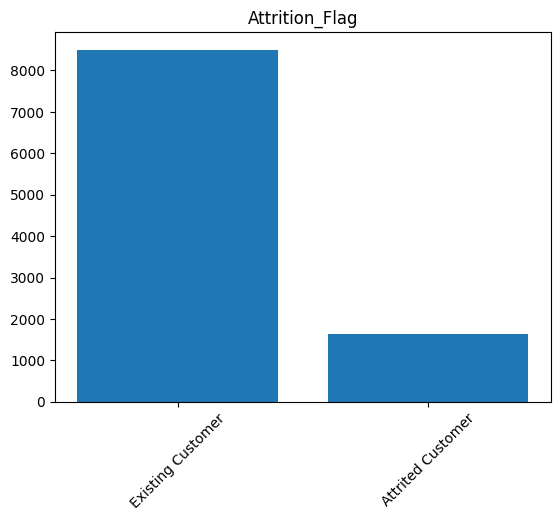

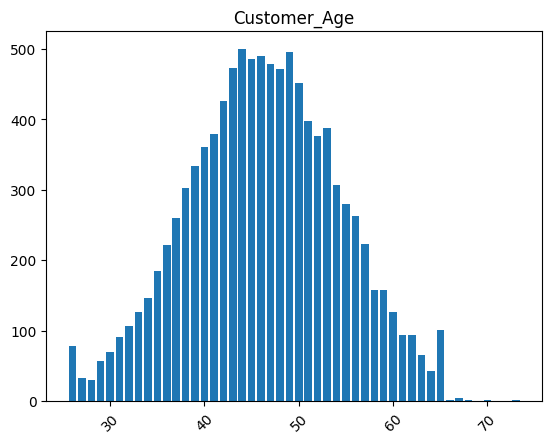

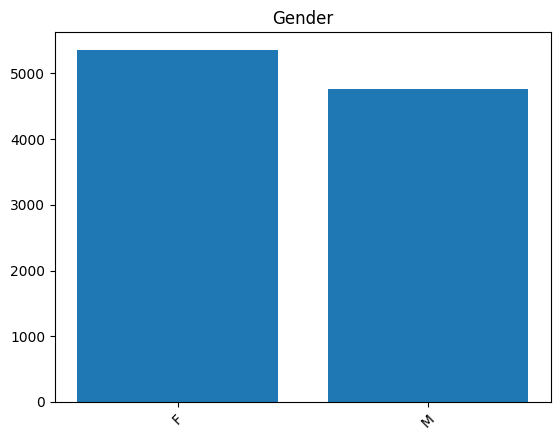

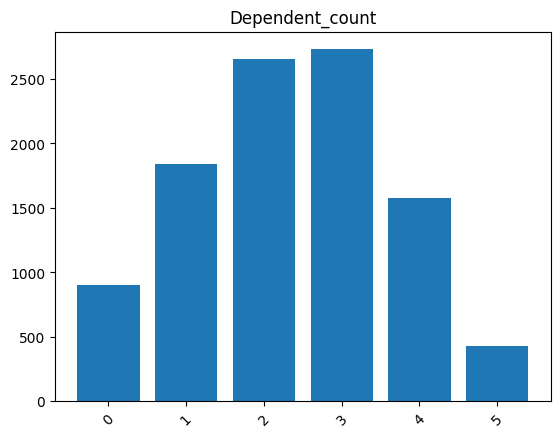

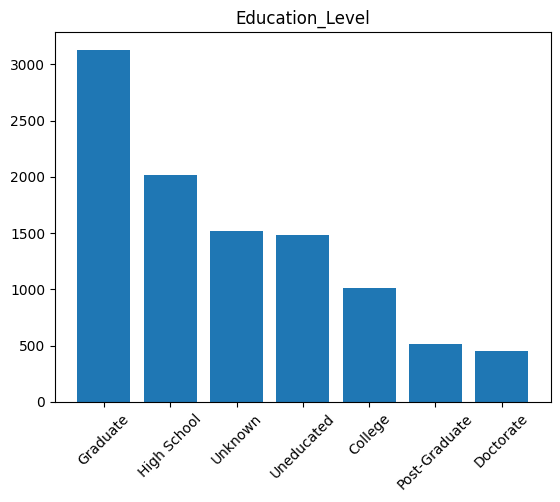

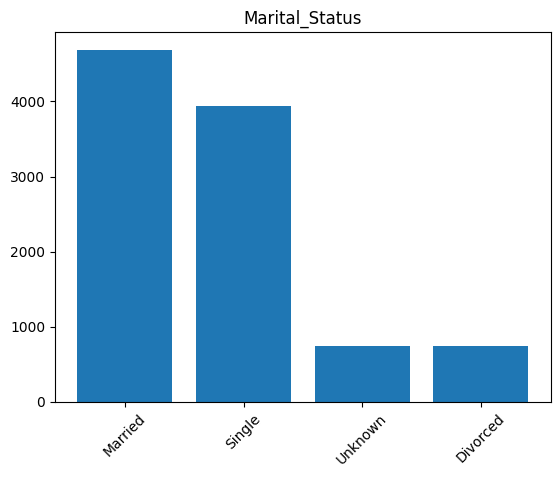

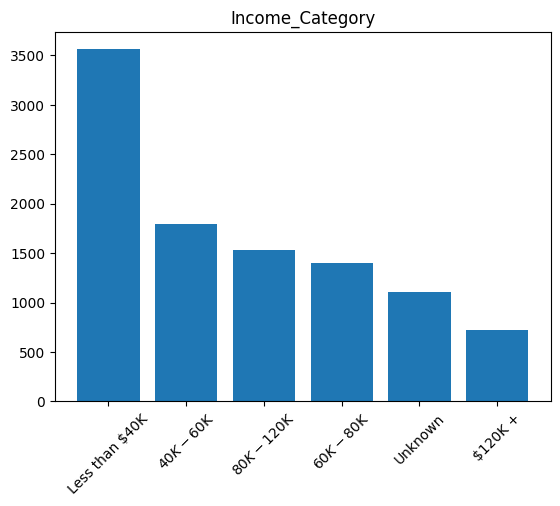

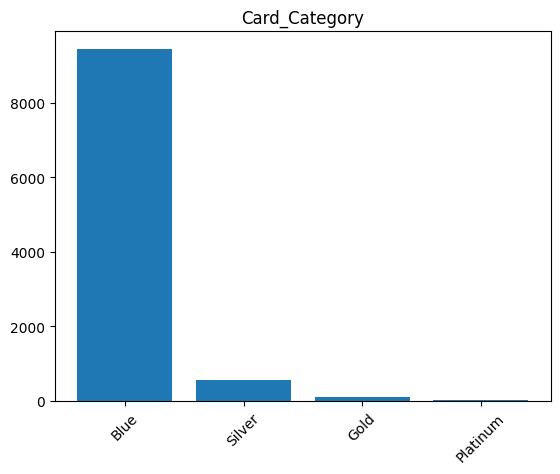

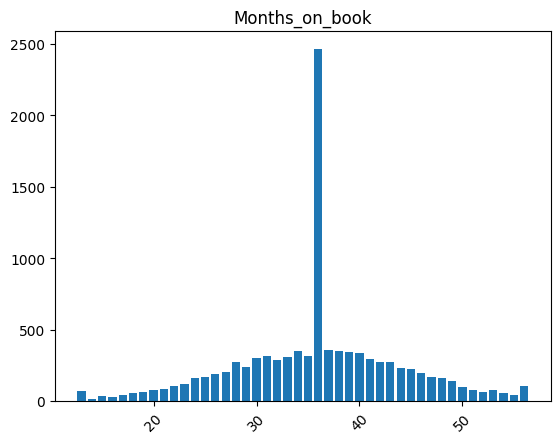

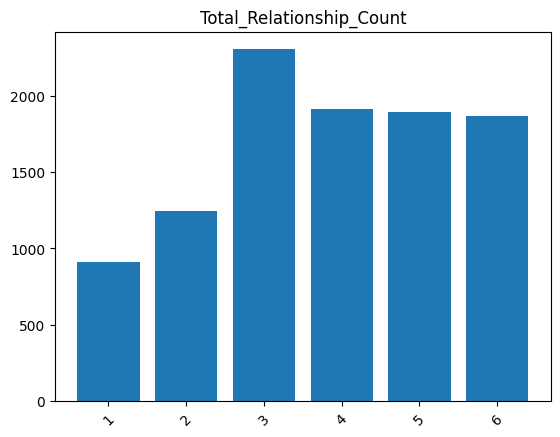

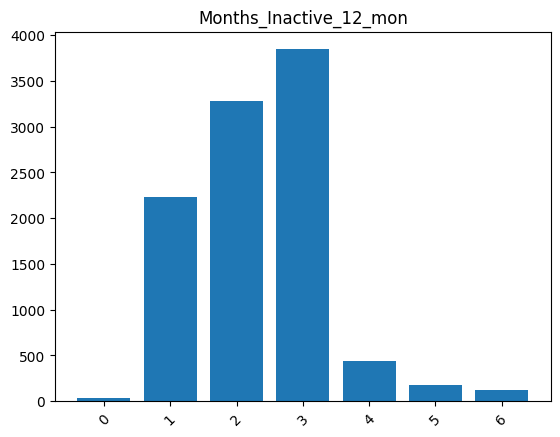

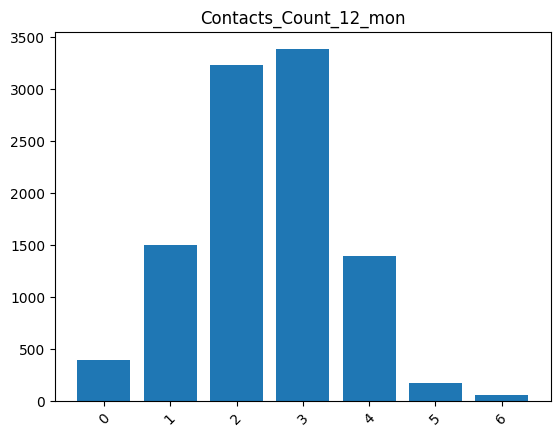

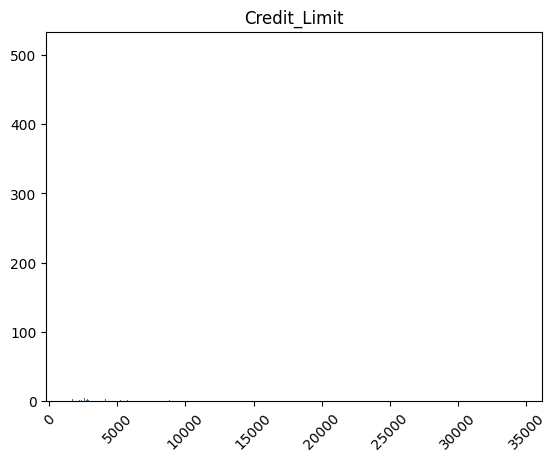

In [256]:
for col in ['Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit']:
    
    df_C= df[col].value_counts()

    plt.bar(df_C.index, df_C.values)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()
    #sacamos un grafico de barras para cada columna 

In [257]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [258]:
df = pd.get_dummies(df, columns=['Attrition_Flag'], dummy_na= False)
df.head(10)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1
5,713061558,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0,1
6,810347208,51,M,4,Unknown,Married,$120K +,Gold,46,6,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0,1
7,818906208,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0,1
8,710930508,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0,1
9,719661558,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0,1


In [259]:
df_t = df['Attrition_Flag_Existing Customer'].groupby(df['Education_Level']).mean()

In [260]:
df_t

Education_Level
College          0.847976
Doctorate        0.789357
Graduate         0.844309
High School      0.847988
Post-Graduate    0.821705
Uneducated       0.840619
Unknown          0.831468
Name: Attrition_Flag_Existing Customer, dtype: float64

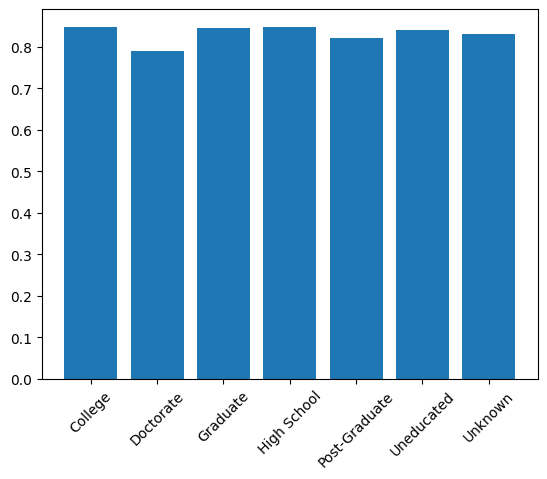

In [261]:
plt.bar(df_t.index,df_t.values)
plt.xticks(rotation=45)
plt.show()

In [262]:
df['Attrition_Flag_Existing Customer'].groupby(df['Gender']).value_counts()

Gender  Attrition_Flag_Existing Customer
F       1                                   4428
        0                                    930
M       1                                   4072
        0                                    697
Name: Attrition_Flag_Existing Customer, dtype: int64

In [263]:
df.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,1
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1


In [303]:
df_H = df['Attrition_Flag_Existing Customer'].groupby(df['Total_Revolving_Bal']).mean().value_counts()
df_H

1.000000    1460
0.000000     133
0.750000      79
0.666667      75
0.500000      67
0.800000      59
0.833333      39
0.857143      18
0.875000      13
0.888889       9
0.600000       5
0.714286       5
0.333333       3
0.900000       2
0.625000       2
0.909091       2
0.916667       1
0.638462       1
0.688976       1
Name: Attrition_Flag_Existing Customer, dtype: int64

(array([18.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.0000e+00, 1.4690e+02, 2.9280e+02, 4.3870e+02, 5.8460e+02,
        7.3050e+02, 8.7640e+02, 1.0223e+03, 1.1682e+03, 1.3141e+03,
        1.4600e+03]),
 <BarContainer object of 10 artists>)

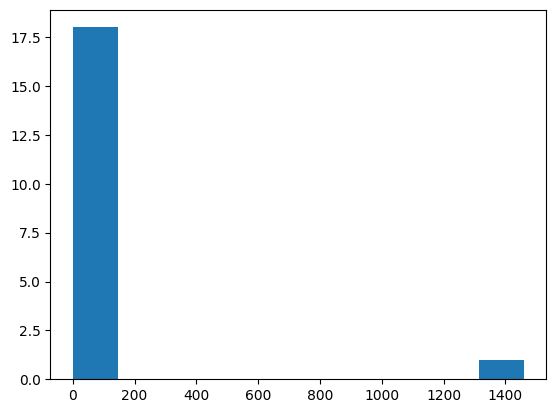

In [304]:
plt.hist(df_H)

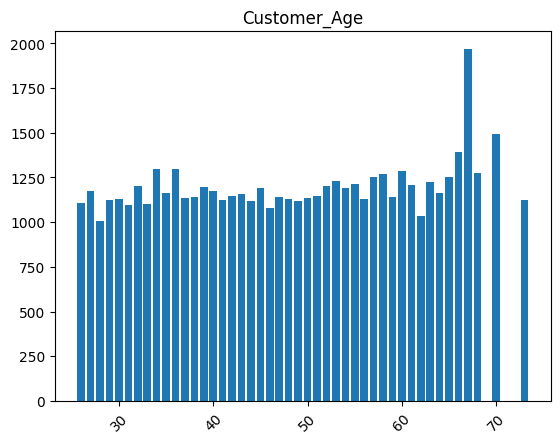

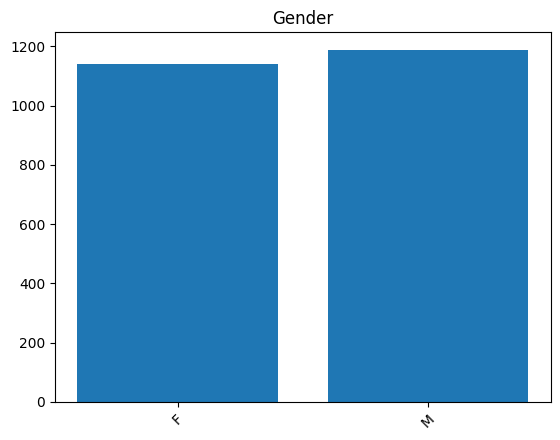

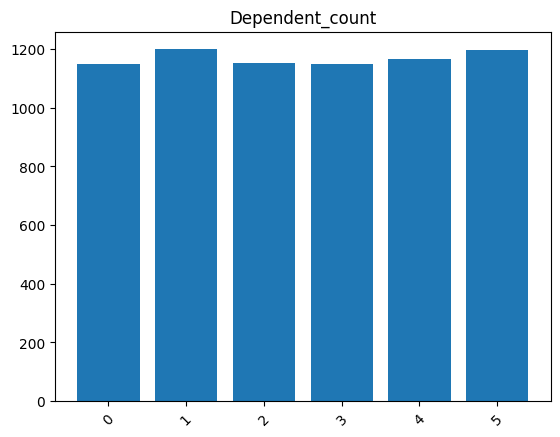

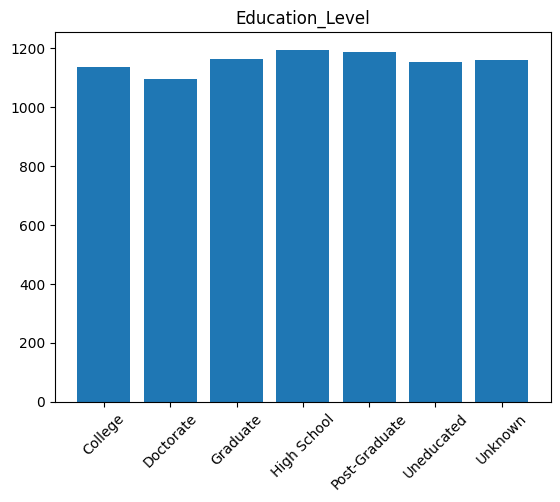

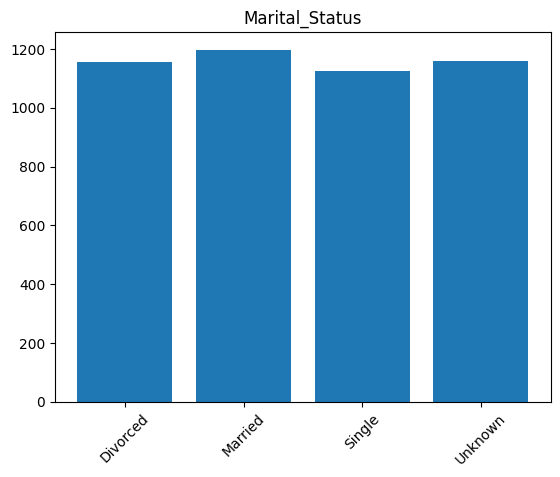

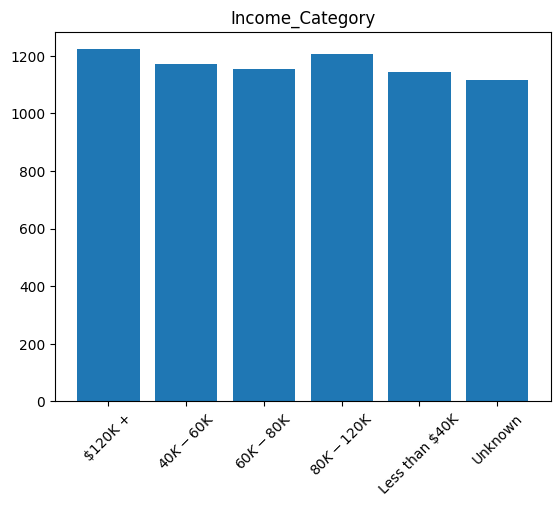

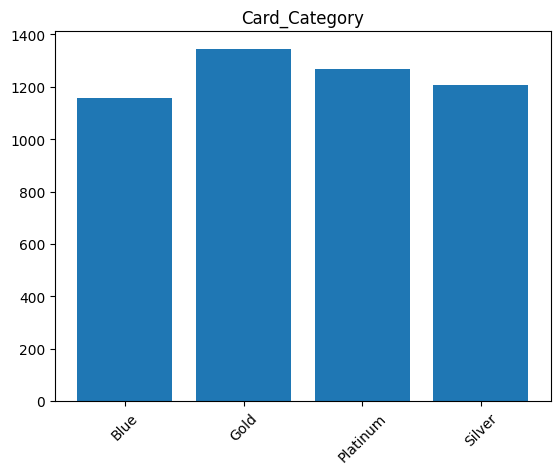

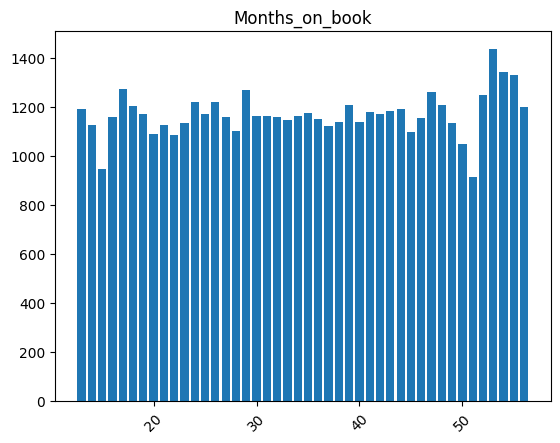

In [296]:
for col in df.columns[1:9]:
    df_t = df.groupby(col)['Total_Revolving_Bal'].mean()
    plt.bar(df_t.index,df_t.values)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()

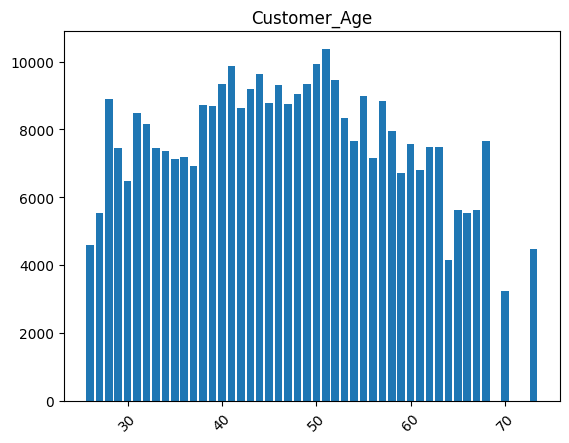

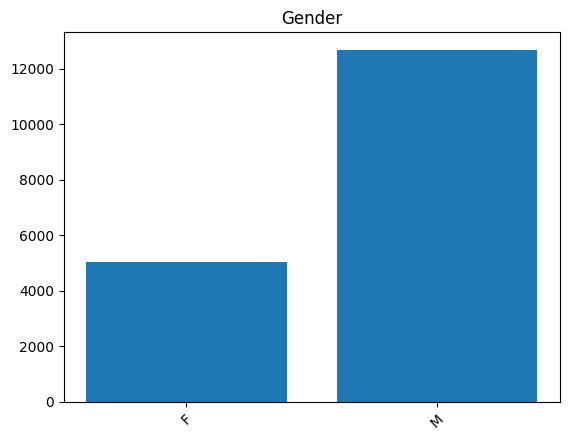

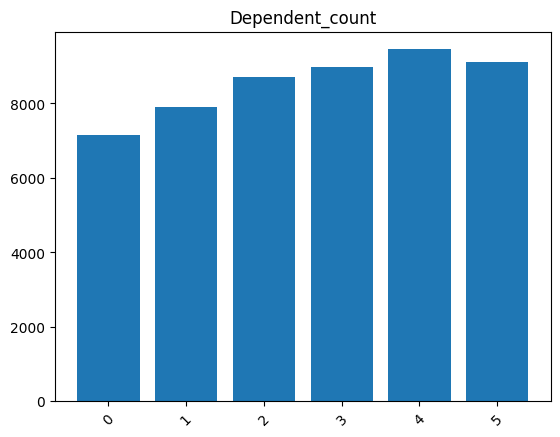

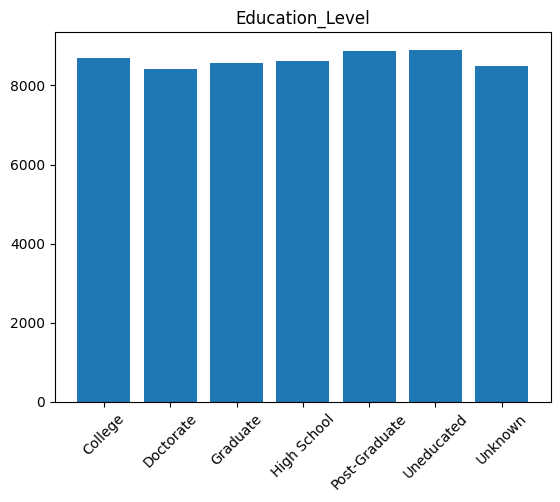

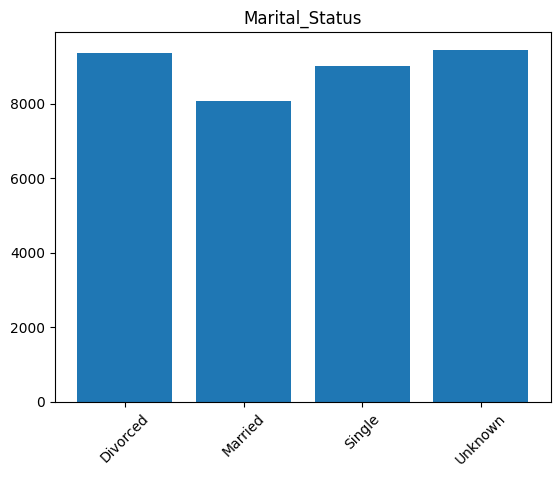

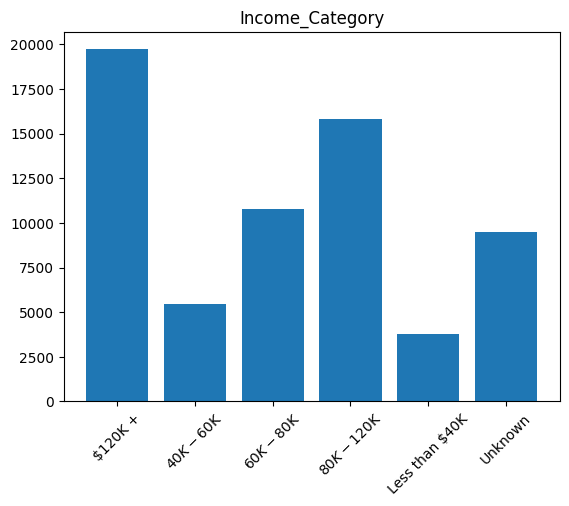

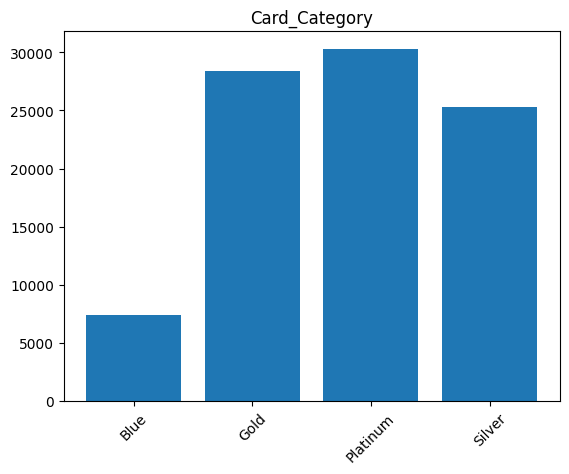

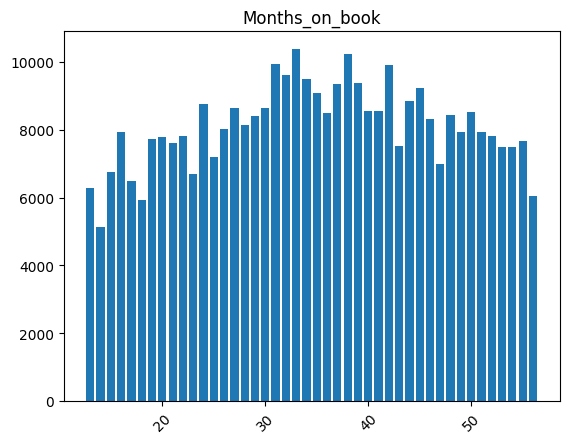

In [271]:
for col in df.columns[1:9]:
    df_t = df.groupby(col)['Credit_Limit'].mean()
    plt.bar(df_t.index,df_t.values)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()
    # comparamos el limite de credito para cada columna 

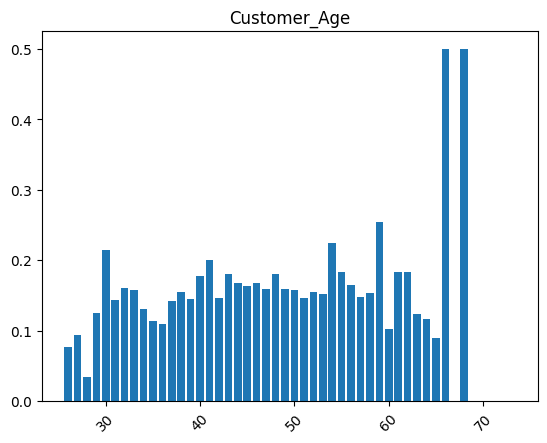

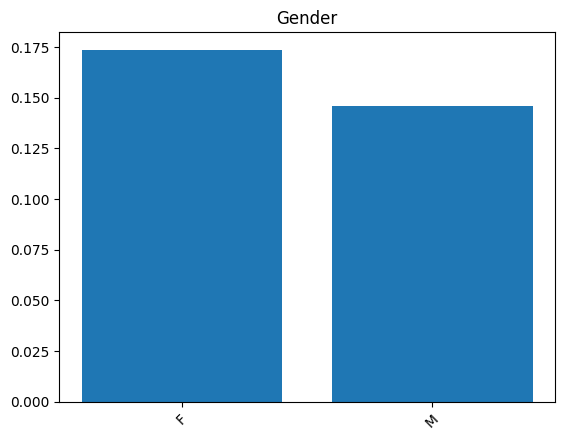

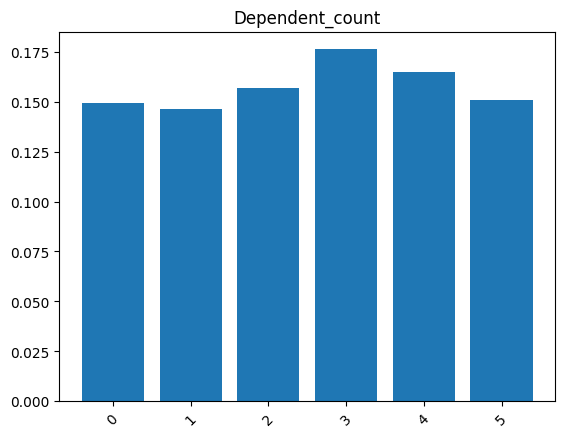

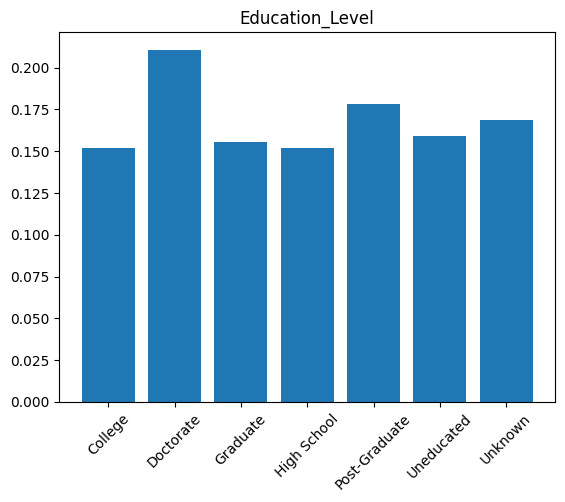

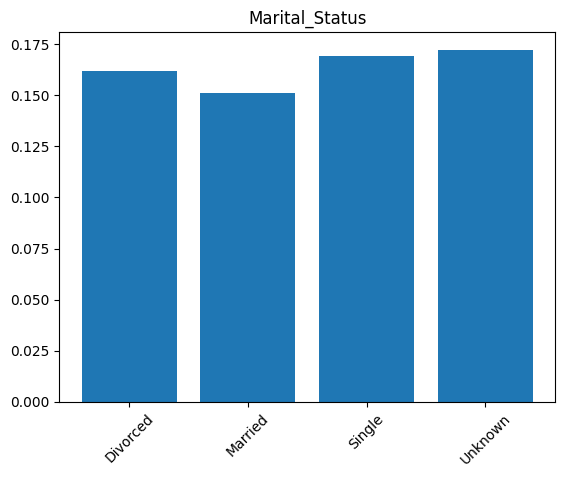

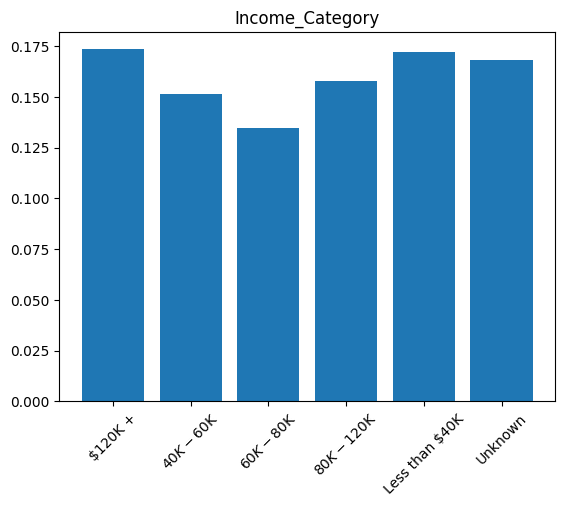

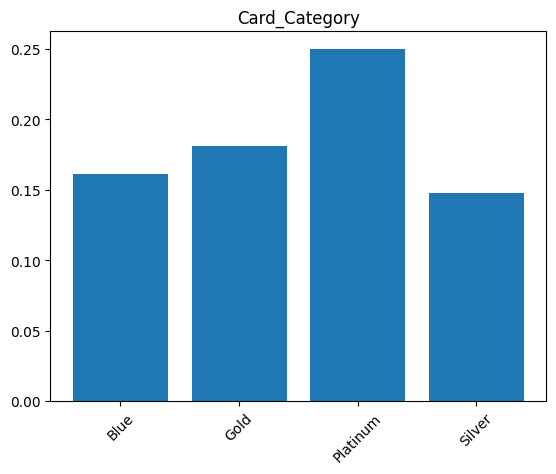

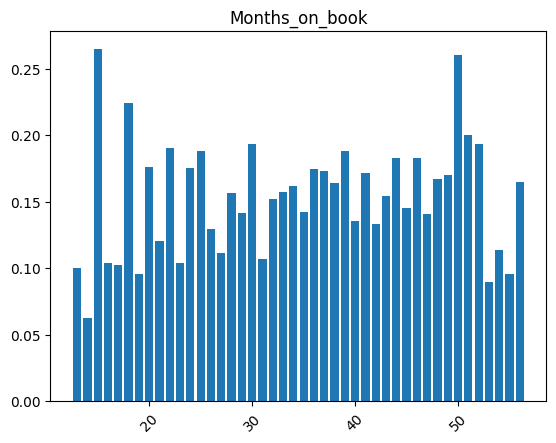

In [273]:
for col in df.columns[1:9]:
    df_t = df.groupby(col)['Attrition_Flag_Attrited Customer'].mean()
    plt.bar(df_t.index,df_t.values)
    plt.xticks(rotation=45)
    plt.title(col)
    plt.show()
    
    
    #En estas Gráficas podemos ver la relacion de las columnas con los clientes que se han ido

In [283]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 3
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)

    outlier_indices = pd.Series(outlier_indices).value_counts()
    outlier_indices = outlier_indices[outlier_indices >= 2].index
    
    return outlier_indices

In [294]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [291]:
df.corr()

C:\Users\joseo\AppData\Local\Temp\ipykernel_19244\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266,-0.046430,0.046430
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114,0.018203,-0.018203
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135,0.018991,-0.018991
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541,0.013687,-0.013687
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663,-0.150005,0.150005
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503,0.152449,-0.152449
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471,0.204491,-0.204491
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965,-0.023873,0.023873
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022,-0.263053,0.263053
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808,-0.000285,0.000285


C:\Users\joseo\AppData\Local\Temp\ipykernel_19244\1146500833.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), center=0, cmap='bwr')


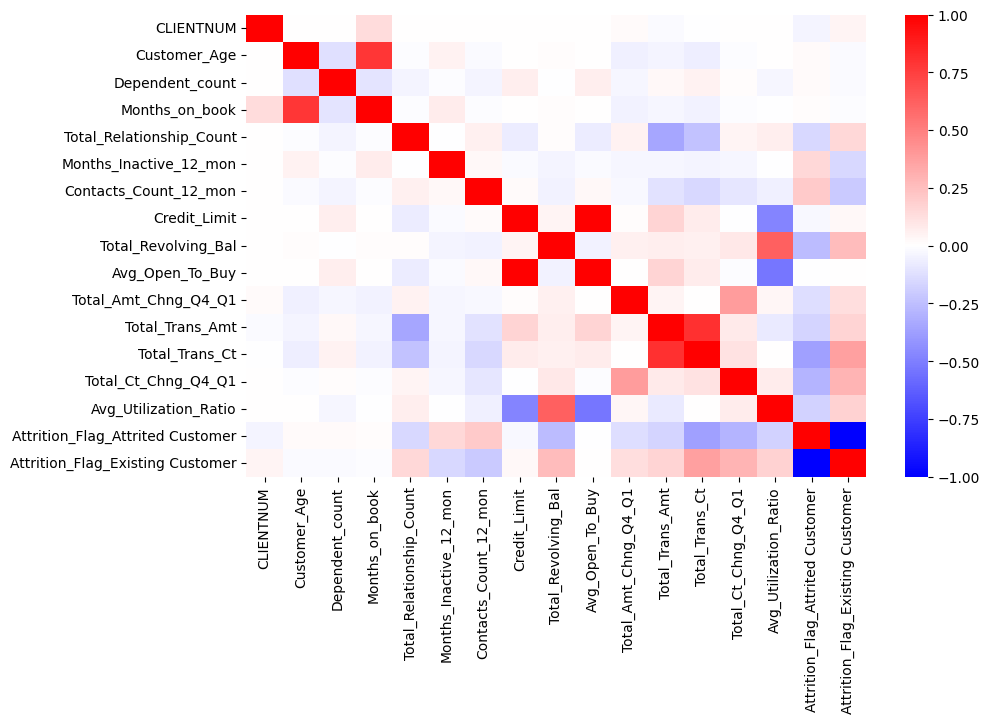

In [292]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), center=0, cmap='bwr')
plt.show()

CÓDIGO JORGE

In [17]:
df = df[df.columns[1:-2]]
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [18]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [19]:
df.describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

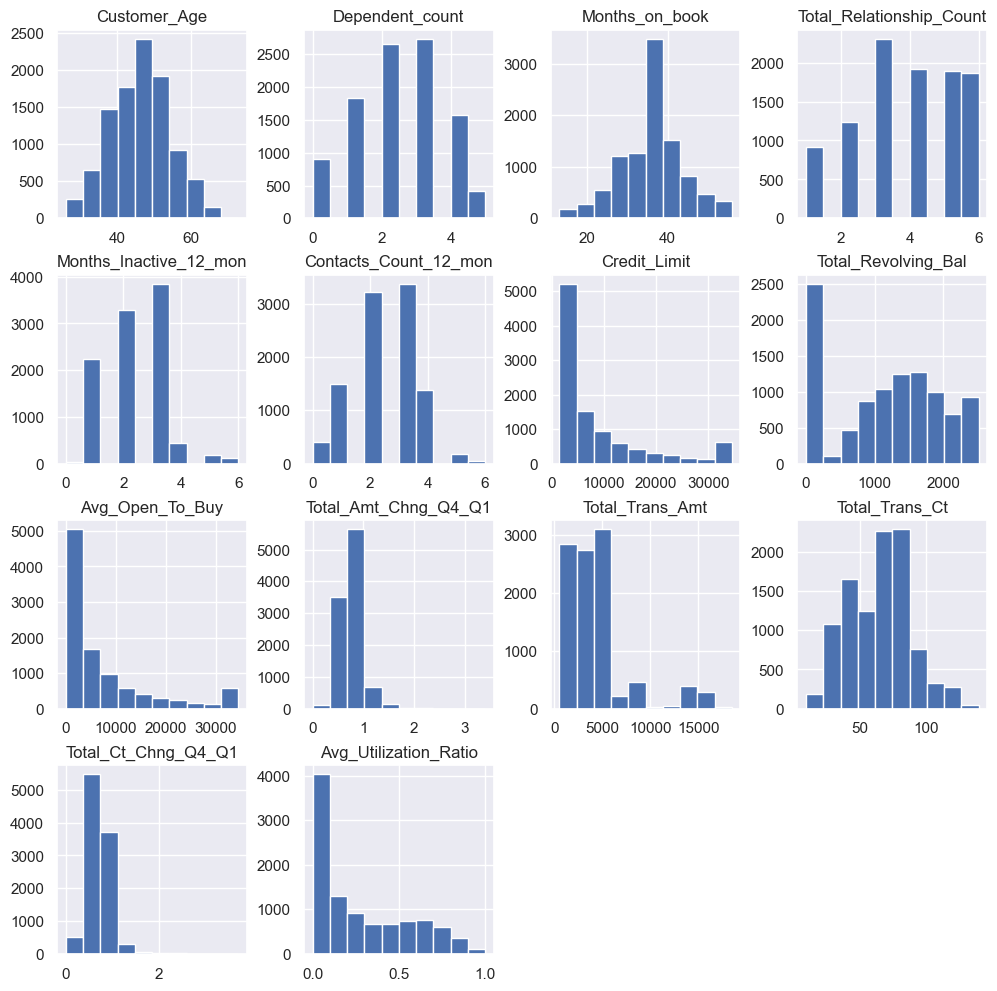

In [21]:
df.hist(figsize=(12,12));

In [22]:
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [30]:
df['Attrition_Flag_num'] = df['Attrition_Flag'].map({'Existing Customer':0, 'Attrited Custoemer':1})

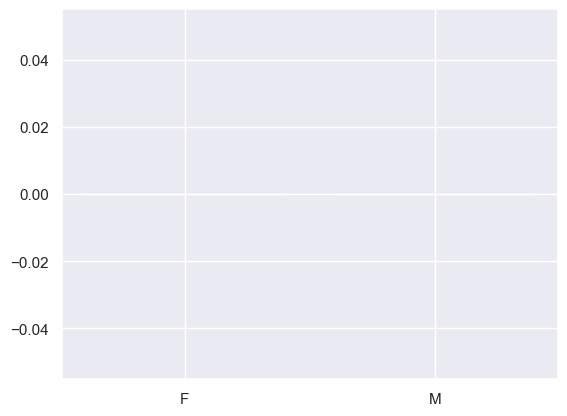

In [33]:
df_g = df.groupby('Gender')['Attrition_Flag_num'].mean()
plt.bar(df_g.index, df_g.values*100);

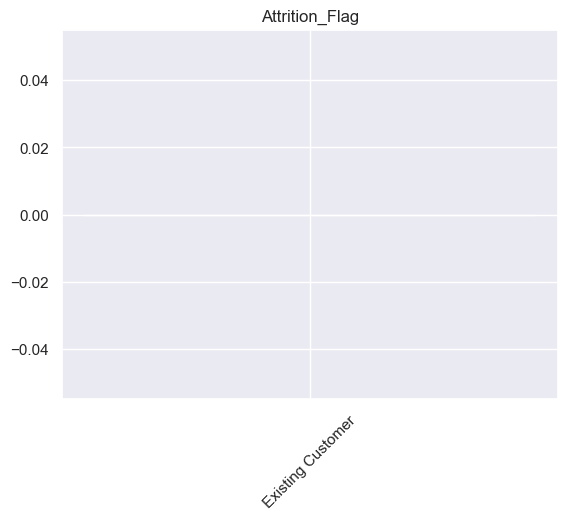

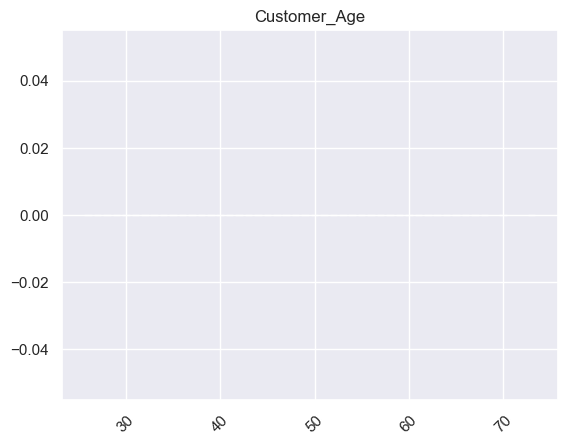

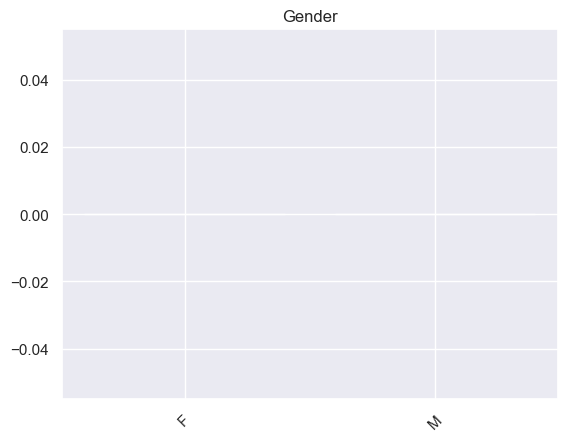

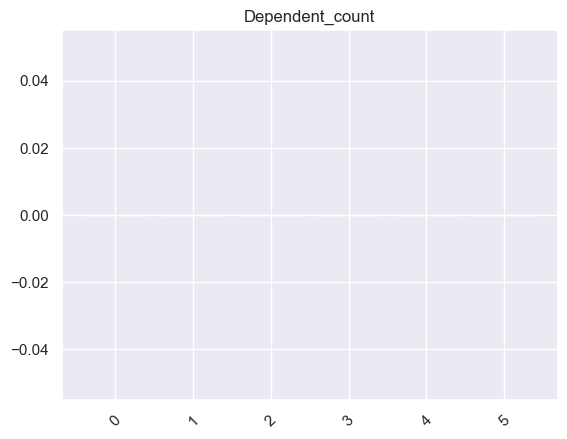

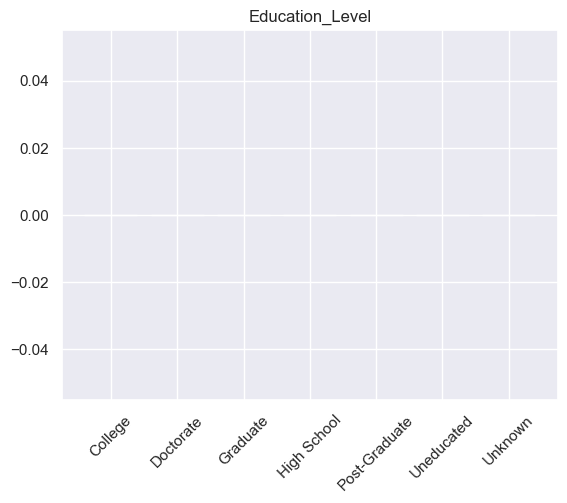

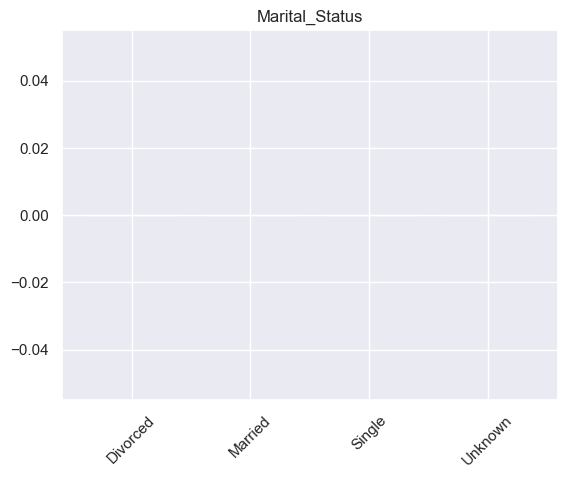

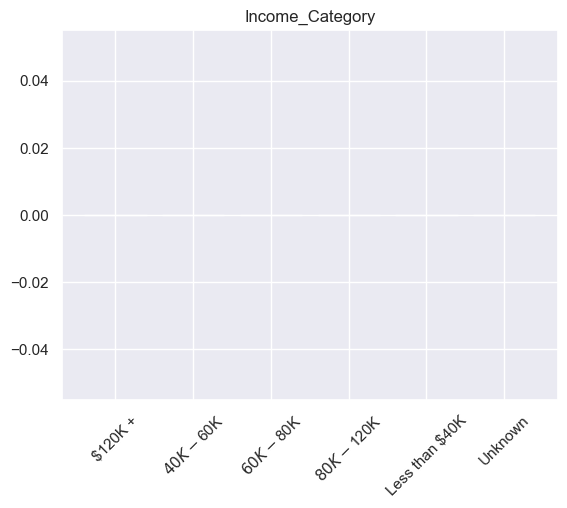

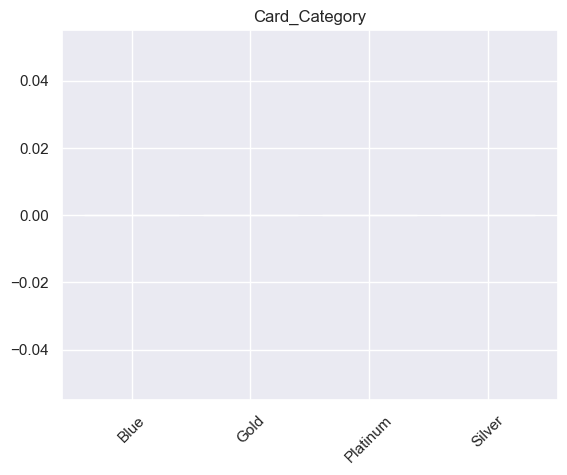

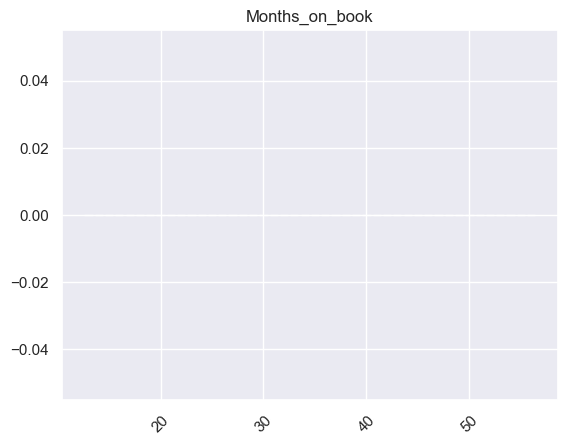

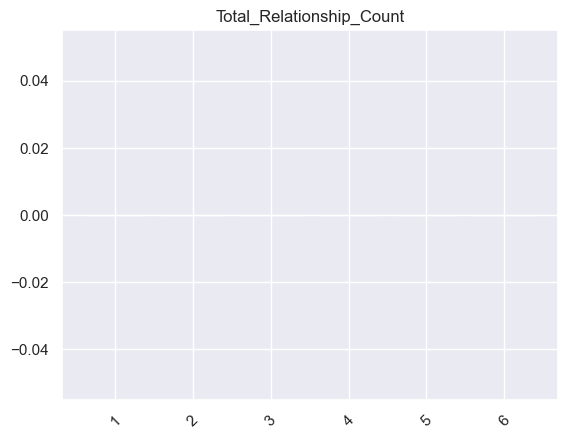

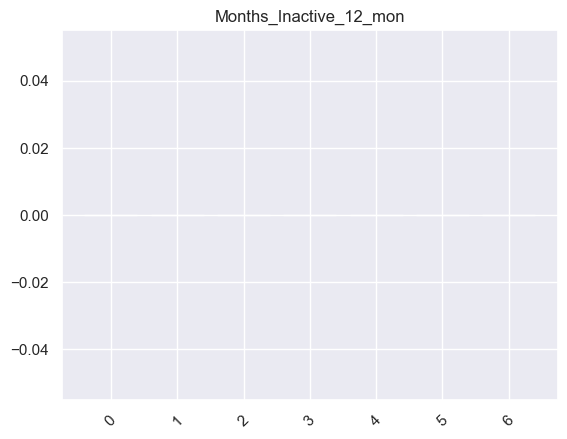

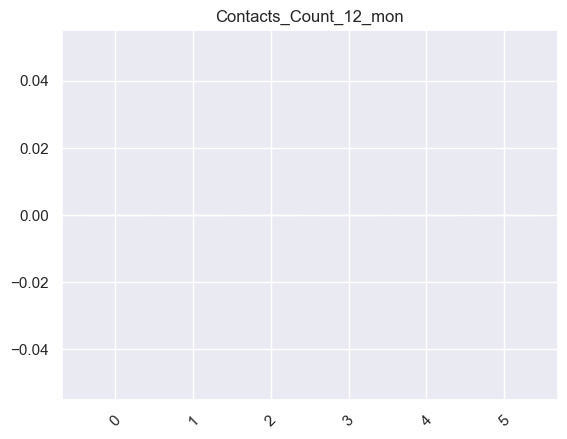

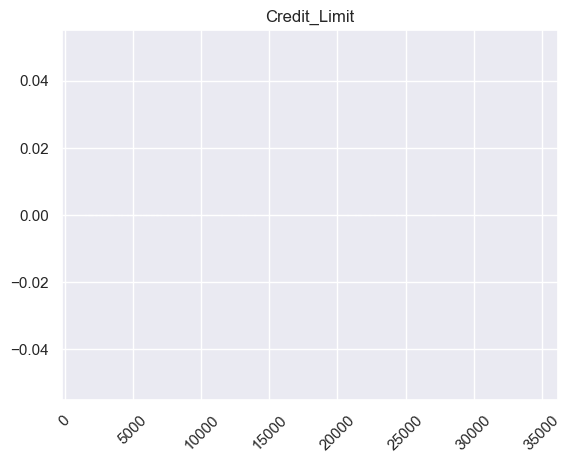

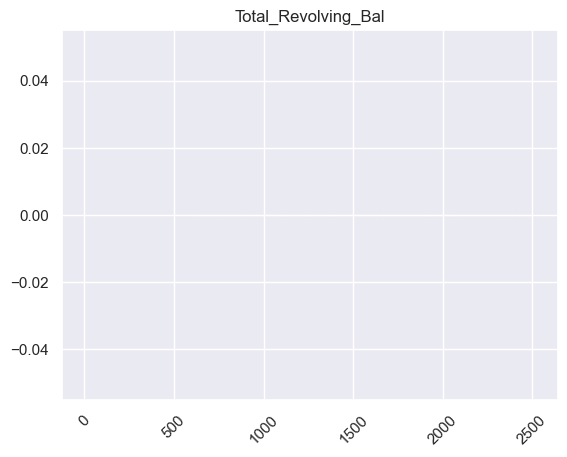

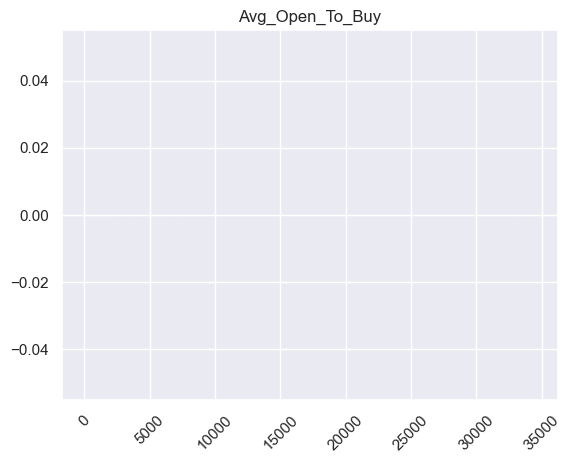

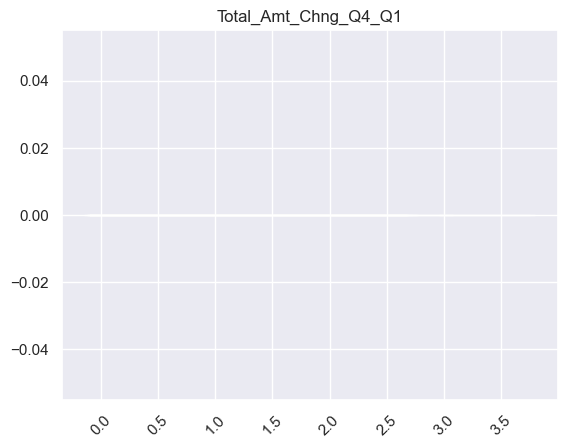

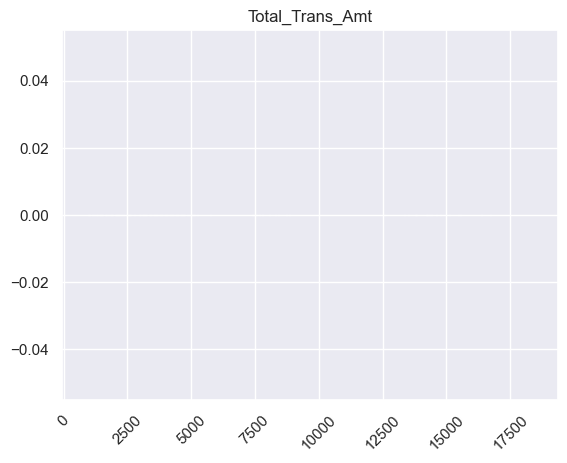

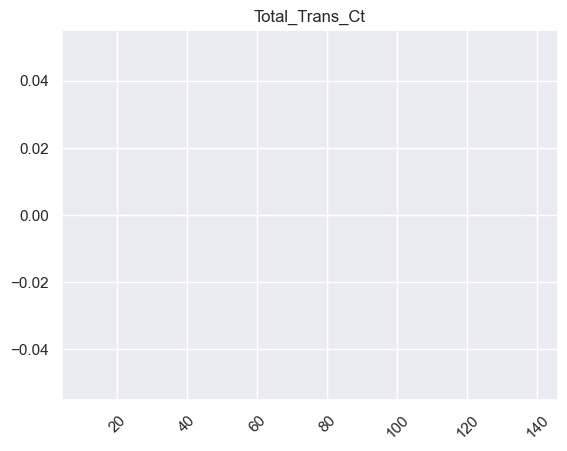

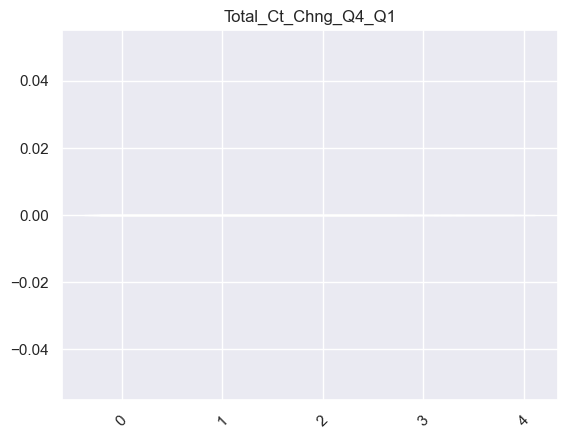

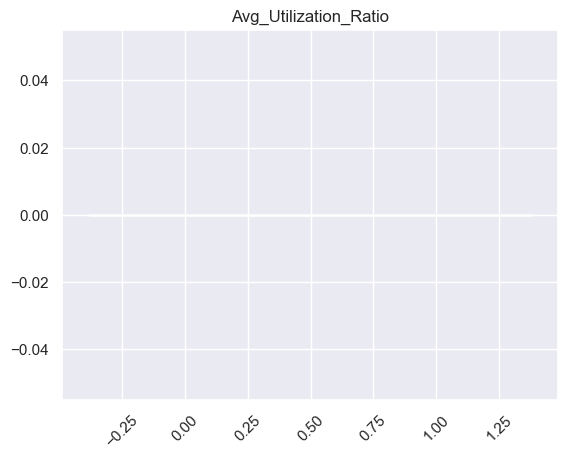

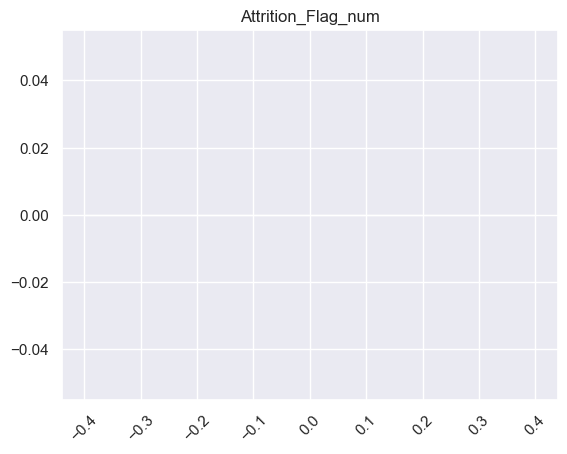

In [34]:
for col in df[2:8]:
    df_g = df.groupby(col)['Attrition_Flag_num'].mean()
    
    plt.bar(df_g.index, df_g.values * 100)
    plt.title(col)
    plt.xticks(rotation = 45)
    plt.show()

In [ ]:
df_0 = df.loc[df['Attrition_Flag_num'] == 0, 'Customer_Age']
df_1 = df.loc[df['Attrition_Flag_num'] ==1, 'Customer_Age']